# Taller modelos lineales

Realizado por: Juan David Castillo Garza y Daniela Alexandra Herrera Faldiño

# Parte 1 - Regresión lineal

Estimar una regresión con los datos de ingresos


## Previsión de ingresos

Vamos a trabajar con un conjunto de datos del censo de EE.UU. indome ([diccionario de datos](https://archive.ics.uci.edu/ml/datasets/Adult))

A muchas empresas les gustaría personalizar su oferta en función de los ingresos del cliente. Los clientes con ingresos elevados podrían, por ejemplo, estar expuestos a productos premium. Como los ingresos de un cliente no siempre se conocen explícitamente, el modelo predictivo podría estimar los ingresos de una persona basándose en otra información.

Nuestro objetivo es crear un modelo predictivo que sea capaz de dar una estimación de los ingresos de una persona.


In [241]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sb

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [242]:
income.shape

(32561, 15)

## Ejercicio 4.1 

¿Cuál es la relación entre la edad y la renta?



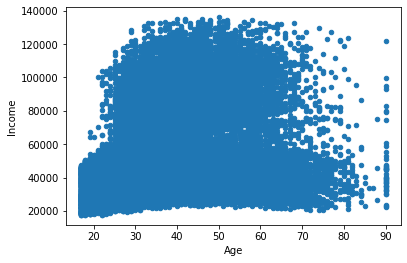

In [243]:
income.plot(x='Age', y='Income', kind='scatter')

Es una relacion proporcional en los primeros años, a medida que incrementa la edad, incrementa el ingreso, pero en los años 50 a mayor, parece que el rango de ingresos es constante independientemente que se incremente la edad, y esto se puede confirmar con la correlacion

In [244]:
income[['Age','Income']].corr()

,Age,Income
Age,1.000000,0.290408
Income,0.290408,1.000000


Donde vemos que la correlacion entre la edad y la renta es positiva y es "Debil-Media"

## Ejercicio 4.2
Para un aumento del uno por ciento en la edad, ¿cuánto aumenta la renta?
Utilizando sklearn estime una regresión lineal y prediga los ingresos cuando la Edad es de 30 y 40 años.

In [245]:
X=income[['Age']].values
y=income[['Income']].values

In [246]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

linreg = LinearRegression(fit_intercept=True) # Con intercepto ya que no centralizamos los datos

linreg.fit(X, y)

LinearRegression()

In [247]:
print(linreg.coef_ ,linreg.intercept_)

[[542.16765707]] [32538.08813087]


Para un aumento de una unidad en la edad, la renta aumenta en **542.1676**

In [248]:
x1=np.array(30) ;x2=np.array(40)

x1=x1.reshape(-1,1) ; x2=x2.reshape(-1,1)
x1

array([[30]])


**Prediccion ingresos de 30 años**

In [249]:
linreg.predict(x1) # La prediccion de la renta de una persona de 30 años segun el modelo lineal es de 48803.117

array([[48803.11784304]])

**Prediccion ingresos de 40 años**

In [250]:
linreg.predict(x2) # La prediccion de la renta de una persona de 40 años segun el modelo lineal es de 54224.794

array([[54224.79441376]])

El modelo queda escrito como $Y=32538.0881+542.167\cdot{X_1}  +ϵ$


## Ejercicio 4.3

Ejecute un modelo de regresión utilizando como características la Edad y la Edad$^2$ utilizando las ecuaciones OLS. Prediga de nuevo los ingresos cuando la Edad es de 30 y 40 años, y compare con el modelo anterior.

In [251]:
income['Age2'] = income['Age'] ** 2
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income,Age2
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0,1521
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0,2500
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0,1444
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0,2809
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0,784


In [252]:
X=income[['Age','Age2']].values
X

array([[  39, 1521],
       [  50, 2500],
       [  38, 1444],
       ...,
       [  58, 3364],
       [  22,  484],
       [  52, 2704]])

In [253]:
#from sklearn.preprocessing import StandardScaler
#ss = StandardScaler(with_mean=True, with_std=True) 
#ss.fit(X.astype(np.float))
#X = ss.transform(X.astype(np.float))
#ss.mean_, ss.scale_

In [254]:
#y_mean, y_std = y.mean(), y.std()
#y = (y - y_mean)/ y_std

In [255]:
x1 = np.array([30., 30.**2]) ; x2 = np.array([40., 40.**2])

# scale
#x_scaled = ss.transform(x.reshape(1, -1)) # La media y desviacion que usaba antes, para regresar a los datos originales y predecir
#x_ = x_scaled
#x_
x1_scaled=x1.reshape(1,-1) ; x2_scaled=x2.reshape(1,-1)
x1_=x1_scaled ; x2_ = x2_scaled
x1_ ; x2_

array([[  40., 1600.]])

In [256]:
linreg2 = LinearRegression(fit_intercept=True) # Con intercepto ya que no centralizamos los datos

linreg2.fit(X, y)

LinearRegression()

In [257]:
linreg2.predict(x1_)  # La prediccion de la renta de una persona de 30 años segun el modelo 2 es de 50238.96

array([[50238.96390027]])

In [258]:
linreg2.predict(x2_) # La prediccion de la renta de una persona de 40 años segun el modelo 2 es de 60176.27

array([[60176.27802692]])

Utilizando la edad y la edad al cuadrado como variables regresoras, Se observa que las predicciones para el ingreso para las mismas edades son mayores en este modelo en comparacion al primero

El modelo 2 queda escrito como $Y=-16225.0709+3131.77014151\cdot{X_1}  -30.54341041\cdot{X_2}+ϵ$
* Siendo $X_1 = $ Edad y $X_2 = $ Edad^2

In [259]:
print(linreg2.coef_ ,linreg2.intercept_)
(3131.770-542.167)/542.167

[[3131.77014151  -30.54341041]] [-16225.07097407]


4.77639362041585

En comparacion al modelo anterior, se ven las siguientes diferencias
* El intercepto $\beta_0$ es negativo en el modelo 2, en el primero es positivo
* El $\beta_1$ del modelo es casi 5 veces mayor en el modelo 2 con respecto al modelo 1, lo que significa que variaciones de la edad en el modelo dos tienen mas impacto en la renta que en el modelo 1


## Ejercicio 4.4
Estime una regresión utilizando más características, diga cuáles y por qué las usó. Prediga de nuevo los ingresos cuando la Edad es de 30 y 40 años, y compare con el modelo anterior.


In [260]:
income.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Income,Age2
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,53455.809158,1674.599152
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,25465.530461,1179.047521
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,17636.000000,289.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,35503.000000,784.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,44978.000000,1369.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,63548.000000,2304.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,136063.000000,8100.000000


Viendo un resumen de las variables cuantitativas (Y education num que es dummy) se decide tomar las horas por semana solamente y no fnlwgt, hicimos una pequeña busqueda de que es esa variable y no encontramos que significa, por lo que mejor no emplearla

In [261]:
Relationship=pd.get_dummies(income['Relationship'] , drop_first=True) # Posibilidad de usar la relacion en el modelo
Relationship
Sex=pd.get_dummies(income['Sex'] , drop_first=True) # Sexo como dummy si la uso en el modelo (1 hombre, 0 mujer)
income2=pd.concat([income,Relationship,Sex], axis = 1)
income2.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,...,Hours per week,Country,Income,Age2,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,40,United-States,51806.0,1521,1,0,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,13,United-States,68719.0,2500,0,0,0,0,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,40,United-States,51255.0,1444,1,0,0,0,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,40,United-States,47398.0,2809,0,0,0,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,40,Cuba,30493.0,784,0,0,0,0,1,0


In [262]:
X=income2[['Age','Age2','Hours per week','Male']].values # Modelo empleando Edad, edad^2, horas por semana, y Sexo
X

array([[  39, 1521,   40,    1],
       [  50, 2500,   13,    1],
       [  38, 1444,   40,    1],
       ...,
       [  58, 3364,   40,    0],
       [  22,  484,   20,    1],
       [  52, 2704,   40,    0]])

In [263]:
x1 = np.array([30., 30.**2,40.,1.]) ; x2 = np.array([40., 40.**2,40.,0.])

# scale
#x_scaled = ss.transform(x.reshape(1, -1)) # La media y desviacion que usaba antes, para regresar a los datos originales y predecir
#x_ = x_scaled
#x_
x1_scaled=x1.reshape(1,-1) ; x2_scaled=x2.reshape(1,-1)
x1_=x1_scaled ; x2_ = x2_scaled
x1_ ; x2_

array([[  40., 1600.,   40.,    0.]])

In [264]:
linreg3 = LinearRegression(fit_intercept=True) # Con intercepto ya que no centralizamos los datos

linreg3.fit(X, y)

LinearRegression()

In [265]:
linreg3.predict(x1_) # La prediccion de la renta de una persona de 30 años, que trabaja 40 horas a la semana y es hombre segun el modelo 3 es de 57075.38

array([[57075.38712298]])

In [266]:
linreg3.predict(x2_) # Prediccion de la renta de una persona de 40 años, que trabaja 40 horas a la semana y es mujer segun el modelo 3 es de 45061.04

array([[45061.04327573]])

In [267]:
print(linreg3.coef_ ,linreg3.intercept_)
(3131.770-2415.50)/2415.50

[[ 2415.50070173   -22.98736825   226.7663329  20078.19308672]] [-23849.84890293]


0.29653073897743737

El modelo 3 queda escrito como $Y=-23849.84+2415.50\cdot{X_1}   -22.98\cdot{X_2}  + 226.76\cdot{X_3} +20078.19\cdot{X_4}+ϵ$
* Siendo $X_1 = $ Edad $X_2 = $ Edad^2 $X_3 = $ Horas por semana y $X_4 = $ Sexo

En comparacion al modelo anterior, se ven los siguientes aspectos
* El intercepto $\beta_0$ es negativo en el modelo 2 al igual que en el modelo 3
* El $\beta_1$ del modelo 2 es mayor con respecto al mode 3, pero ya con una diferencia del 30% aproximadamente
* El incluir la variable sexo cambia en gran medida las estimaciones del modelo 3, y segun el modelo 3 sin revisar supuestos ni si se adecua bien, una persona de la misma edad y las mismas horas trabajadas pero siendo de sexo masculino, gana 20078.19 mas que una mujer

## Ejercicio 4.5

Utilizando las características seleccionadas en el punto anterior, parta la base en training (90%) y validación (10%). Posterior, con la bases de training (90%) aplique un modelo de regresión lineal usando K fold cross validation:
* K = 2
* K = 5
* K = 10

Calcule el MSE de test y el MSE de validación (10% restante) y compare los modelos.

In [268]:
# Separando en el 90% de entrenamiento y 10% de validacion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #test_size= el 10% de los datos uselos para testear, random_state= es una semilla

(29304, 4) (3257, 4) (29304, 1) (3257, 1)


* Para k=2

In [269]:
# Crear el metodo K fold CV
from sklearn.model_selection import KFold
cv = KFold(n_splits=2, random_state=666, shuffle=True) # shuffle que no sea el mismo orden cuando llegan los datos
clf1_tt = LinearRegression()

In [270]:
# Estimar el modelo en cada uno de los k folds
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
scores = cross_validate(clf1_tt, X_train, y_train,scoring='neg_mean_squared_error',cv=cv, return_estimator=True) # scoring= Metrica para evaluar el modelo, n_jobs= usar mas particiones de memoria para que sea mas rapido
scores
for model in scores['estimator']:
    print(model.intercept_,model.coef_)

[-23583.04846353] [[ 2378.37733779   -22.72866297   241.50410958 20351.33640708]]
[-24038.5490115] [[ 2425.98959792   -22.93502336   224.62556668 19816.09871001]]


In [271]:
scores['test_score']

array([-4.36350888e+08, -4.44699826e+08])

In [272]:
# Calcular el mse para el modelo Con el testeo
print('MSE regresión SGD:', abs(np.mean(scores['test_score']))) #440525356.9366698

MSE regresión SGD: 440525356.9366698


Ahora el modelo despues del testeo con k=2 promediando los modelos que empleo para cada validacion, queda escrito de la siguiente forma

$Y = -23810.798+ 2402.183\cdot{X_1} -22.831\cdot{X_2}+ 233.064\cdot{X_3}+ 20083.717\cdot{X_4}+ϵ$

In [273]:
intercepto =(-23583.04846353-24038.5490115)/2
Beta_1 = (2378.37733779+2425.98959792)/2
Beta_2 = (-22.72866297+-22.93502336)/2
Beta_3 = (241.50410958 + 224.62556668)/2 
Beta_4 = (20351.33640708 + 19816.09871001)/2
print(intercepto,Beta_1,Beta_2,Beta_3,Beta_4)

-23810.798737515 2402.1834678550003 -22.831843165 233.06483813 20083.717558545002


In [274]:
y_pred=[]
for i in range(0,3257,1):
  y_pred.append(-23810.798737515 +2402.1834678550003*X_test[i][0] -22.831843165*X_test[i][1] +233.06483813*X_test[i][2] +20083.717558545002*X_test[i][3])

In [275]:
from sklearn import metrics
print('MSE regresión lineal:', metrics.mean_squared_error(y_test, y_pred))

MSE regresión lineal: 432184016.2892616


* Para k = 5

In [276]:
# Crear el metodo K fold CV
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=666, shuffle=True) # shuffle que no sea el mismo orden cuando llegan los datos
clf1_tt = LinearRegression()

In [277]:
# Estimar el modelo en cada uno de los k folds
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
scores = cross_validate(clf1_tt, X_train, y_train,scoring='neg_mean_squared_error',cv=cv, return_estimator=True) # scoring= Metrica para evaluar el modelo, n_jobs= usar mas particiones de memoria para que sea mas rapido
scores
for model in scores['estimator']:
    print(model.intercept_,model.coef_)

[-24024.18590807] [[ 2409.66728612   -22.96620828   234.68529186 20092.16603719]]
[-23728.06698899] [[ 2391.95784935   -22.76516295   235.84326103 20290.50429858]]
[-23582.28533531] [[ 2395.56645061   -22.73280014   231.51540492 20042.94573579]]
[-24754.20366785] [[ 2452.57304294   -23.40238191   231.72652292 20060.61974617]]
[-23011.92686344] [[ 2365.18706968   -22.34276001   230.63876541 19950.62593195]]


In [278]:
scores['test_score']

array([-4.44555287e+08, -4.33967650e+08, -4.28104871e+08, -4.54380502e+08,
       -4.41297270e+08])

In [279]:
# Calcular el mse para el modelo Con el testeo
print('MSE regresión SGD:', abs(np.mean(scores['test_score']))) #440461116.1168003

MSE regresión SGD: 440461116.1168003


In [280]:
intercepto =(-24024.18590807-23728.06698899-23582.28533531-24754.20366785-23011.92686344)/5
Beta_1 = (2409.66728612  + 2391.95784935 +  2395.56645061  + 2452.57304294  + 2365.18706968 )/5
Beta_2 = (-22.96620828+-22.76516295-22.73280014-23.40238191-22.34276001)/5
Beta_3 = (234.68529186+ 235.84326103+231.51540492+231.72652292+230.63876541)/5 
Beta_4 = (20092.16603719 +  20290.50429858 +20042.94573579+20060.61974617+19950.62593195)/5
print(intercepto,Beta_1,Beta_2,Beta_3,Beta_4)

-23820.133752731996 2402.99033974 -22.841862658000004 232.88184922800002 20087.372349936


**Modelo para K=5**

$Y = -23820.133 +2402.990\cdot{X_1}  -22.841\cdot{X_2} +232.881\cdot{X_3} +20087.372\cdot{X_4}+ϵ$

In [281]:
y_pred=[]
for i in range(0,3257,1):
  y_pred.append(  -23820.133752731996 +2402.99033974*X_test[i][0]  -22.841862658000004*X_test[i][1] +232.88184922800002*X_test[i][2] +20087.372349936*X_test[i][3])

In [282]:
from sklearn import metrics
print('MSE regresión lineal:', metrics.mean_squared_error(y_test, y_pred)) 

MSE regresión lineal: 432181393.9835898


* Para K = 10

In [283]:
# Crear el metodo K fold CV
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=666, shuffle=True) # shuffle que no sea el mismo orden cuando llegan los datos
clf1_tt = LinearRegression()

In [284]:
# Estimar el modelo en cada uno de los k folds
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
scores = cross_validate(clf1_tt, X_train, y_train,scoring='neg_mean_squared_error',cv=cv, return_estimator=True) # scoring= Metrica para evaluar el modelo, n_jobs= usar mas particiones de memoria para que sea mas rapido
scores
for model in scores['estimator']:
    print(model.intercept_,model.coef_)

[-23896.99571235] [[ 2404.0944153    -22.88173193   233.9374211  20127.85087167]]
[-23913.51441453] [[ 2407.2789128    -22.90584502   233.39200843 20052.3279279 ]]
[-23950.16540371] [[ 2398.11229431   -22.80764481   236.275118   20241.43959229]]
[-23608.40017258] [[ 2398.0862467    -22.80928863   232.11911201 20111.3534845 ]]
[-23578.00298687] [[ 2392.61341392   -22.72775095   233.33254216 20054.00223329]]
[-23848.57058568] [[ 2406.36236715   -22.85093804   231.24322263 20081.63975406]]
[-24097.16320449] [[ 2414.97800141   -22.96760183   232.04232695 20170.5737686 ]]
[-24364.29066073] [[ 2434.55227519   -23.20675161   232.63597116 19980.61486959]]
[-23469.74188496] [[ 2382.80286461   -22.60804341   234.74997351 20062.76702148]]
[-23438.93472933] [[ 2388.90083235   -22.62298029   228.97203247 19990.25822578]]


In [285]:
scores['test_score']

array([-4.48598983e+08, -4.40376837e+08, -4.30663632e+08, -4.37671082e+08,
       -4.23645378e+08, -4.32022429e+08, -4.61249085e+08, -4.47561579e+08,
       -4.32234987e+08, -4.50215332e+08])

In [286]:
# Calcular el mse para el modelo Con el testeo
print('MSE regresión SGD:', abs(np.mean(scores['test_score']))) #440423932.4094578

MSE regresión SGD: 440423932.4094578


In [287]:
intercepto =(-23896.99571235-23913.51441453-23950.16540371-23608.40017258-23578.00298687-23848.57058568-24097.16320449-24364.29066073-23469.74188496-23438.93472933)/10
Beta_1 = (2404.0944153  +  2407.2789128 +2398.11229431  + 2398.0862467  +  2392.61341392  + 2406.36236715  + 2414.97800141  + 2434.55227519 + 2382.80286461 + 2388.90083235 )/10
Beta_2 = (-22.88173193 +-22.90584502-22.80764481 -22.80928863 -22.72775095 -22.85093804 -22.96760183 -23.20675161 -22.60804341 -22.62298029 )/10
Beta_3 = (233.9374211 + 233.39200843 + 236.275118 + 232.11911201+ 233.33254216 + 231.24322263 + 232.04232695+ 232.63597116 + 234.74997351 +228.97203247 )/10
Beta_4 = (20127.85087167 +  20052.3279279 +  20241.43959229 +20111.3534845 + 20054.00223329  + 20081.63975406 + 20170.5737686+ 19980.61486959 + 20062.76702148 + 19990.25822578)/10
print(intercepto,Beta_1,Beta_2,Beta_3,Beta_4)

-23816.577975523003 2402.7781623739997 -22.838857652 232.869972842 20087.282774916


**Modelo para K=10**

$Y = -23816.577 + 2402.778\cdot{X_1}  -22.838\cdot{X_2} + 232.869\cdot{X_3} + 20087.282\cdot{X_4} +ϵ$

In [288]:
y_pred=[]
for i in range(0,3257,1):
  y_pred.append(-23816.577975523003 +2402.7781623739997*X_test[i][0] -22.838857652*X_test[i][1] +232.869972842*X_test[i][2]+ 20087.282774916*X_test[i][3])

In [289]:
from sklearn import metrics
print('MSE regresión lineal:', metrics.mean_squared_error(y_test, y_pred)) #432181218.8934354 432184016.2892616 432181393.9835898

MSE regresión lineal: 432181218.8934354


In [290]:
min([432181218.8934354, 432184016.2892616 ,432181393.9835898])

432181218.8934354

El modelo con el menor error cuadratico medio testeando con el 10% de la base, es el modelo resultante de una validacion cruzada con k = 10, aunque la diferencia empleando esta metrica no es ni del 1%

#Parte 2: Regresión Logística

### Customer Churn: 
La pérdida/abandono de los clientes de la empresa. Especialmente, las industrias que la adquisición de usuarios es costosa, es de crucial importancia para una empresa para reducir e idealmente hacer que la rotación de clientes a 0 para mantener sus ingresos recurrentes. Si se considera que la retención de clientes es siempre más barata que la adquisición de clientes y generalmente depende de los datos del usuario (uso del servicio o producto), plantea un gran/excitante/difícil problema para el aprendizaje automático.

### Datos
El conjunto de datos procede de un proveedor de servicios de telecomunicaciones en el que se recoge el uso del servicio (plan internacional, plan de buzón de voz, uso diurno, uso nocturno, etc.) y la información demográfica básica (estado y código de área) del usuario. En el caso de las etiquetas, tengo un único punto de datos que indica si el cliente ha sido dado de baja o no.


In [291]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [292]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Ejercicio 4.6

¿Cuál es la distribución de los churners? Haga la transformación correspondiente para predecir Churn. (0-FAlse, 1-True)



In [293]:
Churn=pd.get_dummies(data['Churn?'] , drop_first=True) # Creando la Dummy donde 1 es Verdadero
data2=pd.concat([data,Churn], axis = 1)
data2

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,True.
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,18.32,279.1,83,12.56,9.9,6,2.67,2,False.,0
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,13.04,191.3,123,8.61,9.6,4,2.59,3,False.,0
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,24.55,191.9,91,8.64,14.1,6,3.81,2,False.,0
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,13.57,139.2,137,6.26,5.0,10,1.35,2,False.,0


Por lo entendido, la distribucion de Churn es Bernoulli, donde dependiendo del caso de la empresa, 1 es exito y 0 es fracaso

# Ejercicio 4.7
Entrene una Regresión Logística creando Y y X con la información en IntlCharge.


In [294]:
Y=data2['True.'].values
X=data2['Intl Charge'].values
data2['Churn?'].value_counts()
data2['True.'].value_counts()

0    2850
1     483
Name: True., dtype: int64

In [295]:
# ajustar un modelo de regresión logística y almacenar las predicciones de clase
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['Intl Charge']
X = data2[feature_cols].values
y = data2['True.'].values
logreg.fit(X, y)
data2['Exito'] = logreg.predict(X)

# Ejercicio 4.8

¿Cuáles son los coeficientes de la regresión logística? Interpretelos para un valor de IntlCharge = 1.




In [296]:
# calcula las probabilidades logarítmicas predichas para IntLCharge=1 utilizando la ecuación
logodds = logreg.intercept_ + logreg.coef_[0] * 1
logodds

array([-2.25184351])

In [297]:
# convierte las odds logarítmicas en odds
odds = np.exp(logodds)
odds

array([0.1052051])

In [298]:
# Convertir los odds en probabilidad
prob = odds/(1 + odds)
prob

array([0.09519057])

In [299]:
# examinar el coeficiente de al
feature_cols, logreg.coef_[0] , logreg.intercept_

(['Intl Charge'], array([0.2624392]), array([-2.51428271]))

El intercepto es de -2.5142 y el coeficiente para IntlCharge es 0.262, lo que significa que a un aumento de IntlCharge, corresponde un aumento de 0.2624 unidades en las probabilidades logaritmicas, en otras palabras, se incrementa la probabilidad de exito

# Ejercicio 4.9

Seleccione 3 variables independientes para entrenar una regresión logística. Interprete cada uno de los valores de los coeficientes en función de la variable churn.


In [300]:
X=data2[['Intl Mins','Day Calls','Night Mins']]
Y
X.corr() 

,Intl Mins,Day Calls,Night Mins
Intl Mins,1.000000,0.021565,-0.015207
Day Calls,0.021565,1.000000,0.022938
Night Mins,-0.015207,0.022938,1.000000


Revisando las autocorrelaciones, las variables entre ellas tienen una autocorrelacion negativa y debil, por lo que se puede pensar en independencia entre ellas

In [301]:
# Ajustar un modelo de regresión logística y almacenar las predicciones de clase
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = [['Intl Mins','Day Charge','Night Mins']]
X=data2[['Intl Mins','Day Charge','Night Mins']].values
y = data2['True.'].values
logreg.fit(X, y)
data2['Exito2'] = logreg.predict(X)
data2['True.'].value_counts()

0    2850
1     483
Name: True., dtype: int64

In [302]:
#### Intercepto y coeficientes
print(logreg.intercept_ ,logreg.coef_)

[-5.18418138] [[0.07707609 0.06695148 0.00212262]]


Con respecto a los coeficiente para Intmin es 0.07707609, para Day Charge es 0.06695148 y para Night Mins es 0.00212262, lo que significa que a un aumento de Intlmin , Day Charge o Night mins le corresponden el respectivo aumento de unidades en las probabilidades logaritmicas, en otras palabras, se incrementa la probabilidad de exito

## Ejercicio 4.10

Utilizando las 3 variables independientes del punto anterior, particione la base en training (90%) y validación (10%). Posterior, con la bases de training (90%) aplique un modelo de regresión logística usando K fold cross validation:
* K = 2
* K = 5
* K = 10

Calcule la precisión de test y la precisión de validación(10% restante) y compare los modelos.

* Para k = 2

In [303]:
X=data2[['Intl Mins','Day Charge','Night Mins']].values
Y = data2['True.'].values

In [304]:
# Separando en el 90% de entrenamiento y 10% de validacion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #test_size= el 10% de los datos uselos para testear, random_state= es una semilla

(2999, 3) (334, 3) (2999,) (334,)


In [305]:
# Crear el metodo K fold CV
from sklearn.model_selection import KFold
cv = KFold(n_splits=2, random_state=666, shuffle=True) # shuffle que no sea el mismo orden cuando llegan los datos
Logisticuwu = LogisticRegression(solver='liblinear',C=1e9)

In [306]:
from sklearn.model_selection import cross_validate
scores = cross_validate(Logisticuwu, X_train, y_train,scoring='accuracy',cv=cv, return_estimator=True) # scoring= Metrica para evaluar el modelo, n_jobs= usar mas particiones de memoria para que sea mas rapido
scores
for model in scores['estimator']:
    print(model.intercept_,model.coef_)

[-5.26561647] [[0.09037392 0.0724892  0.00098921]]
[-4.81031748] [[0.04816447 0.05719485 0.00326893]]


In [307]:
scores['test_score']

array([0.862     , 0.85256838])

In [308]:
intercepto=[];beta_0=[];beta_1=[];beta_2=[]
for j in range(0,2,1):
  intercepto.append (scores['estimator'][j].intercept_[0])
  beta_0.append (scores['estimator'][j].coef_[0][0])
  beta_1.append (scores['estimator'][j].coef_[0][1])
  beta_2.append (scores['estimator'][j].coef_[0][2])
print(np.mean(intercepto),np.mean(beta_0),np.mean(beta_1),np.mean(beta_2))

-5.03796697765871 0.06926919647308036 0.06484202474319833 0.0021290689356612408


In [309]:
logodds = np.mean(intercepto)+np.mean(beta_0)+np.mean(beta_1)+np.mean(beta_2)
logodds

-4.90172668750677

In [310]:
y_pred=[]
for i in range(0,334,1):
  ods = np.exp(np.mean(intercepto)+np.mean(beta_0)*X_test[i][0]+np.mean(beta_1)*X_test[i][1]+np.mean(beta_2)*X_test[i][2])
  proba = ods/(1-ods)
  if proba<=0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

In [311]:
from sklearn import metrics
print(' Agrupamiento Precision :', metrics.accuracy_score(y_test, y_pred))

 Agrupamiento Precision : 0.8353293413173652


La precision para el testeo es de 0.8353293413173652

* Para k = 5

In [312]:
# Crear el metodo K fold CV
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=666, shuffle=True) # shuffle que no sea el mismo orden cuando llegan los datos
Logisticuwu = LogisticRegression(solver='liblinear',C=1e9)

In [313]:
from sklearn.model_selection import cross_validate
scores = cross_validate(Logisticuwu, X_train, y_train,scoring='accuracy',cv=cv, return_estimator=True) # scoring= Metrica para evaluar el modelo, n_jobs= usar mas particiones de memoria para que sea mas rapido
scores
for model in scores['estimator']:
    print(model.intercept_,model.coef_)

[-5.49817656] [[0.08711488 0.07253111 0.0020914 ]]
[-4.9796943] [[0.07249306 0.06475871 0.00192195]]
[-4.97433682] [[0.06537109 0.06477868 0.00191093]]
[-5.3628106] [[0.07168437 0.06857526 0.00291933]]
[-5.06424641] [[0.07074939 0.06087861 0.00285018]]


In [314]:
scores['test_score']

array([0.855     , 0.88      , 0.84166667, 0.85666667, 0.85475793])

In [315]:
intercepto=[];beta_0=[];beta_1=[];beta_2=[]
for j in range(0,5,1):
  intercepto.append (scores['estimator'][j].intercept_[0])
  beta_0.append (scores['estimator'][j].coef_[0][0])
  beta_1.append (scores['estimator'][j].coef_[0][1])
  beta_2.append (scores['estimator'][j].coef_[0][2])
print(np.mean(intercepto),np.mean(beta_0),np.mean(beta_1),np.mean(beta_2))

-5.1758529392583075 0.07348255933575336 0.06630447460336113 0.002338755563257021


In [316]:
y_pred=[]
for i in range(0,334,1):
  ods = np.exp(np.mean(intercepto)+np.mean(beta_0)*X_test[i][0]+np.mean(beta_1)*X_test[i][1]+np.mean(beta_2)*X_test[i][2])
  proba = ods/(1-ods)
  if proba<=0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

In [317]:
from sklearn import metrics
print(' Agrupamiento Precision :', metrics.accuracy_score(y_test, y_pred))

 Agrupamiento Precision : 0.8293413173652695


La precision para el testeo con k= 5 es de 0.8293413173652695

* Para k = 10

In [318]:
# Crear el metodo K fold CV
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=666, shuffle=True) # shuffle que no sea el mismo orden cuando llegan los datos
Logisticuwu = LogisticRegression(solver='liblinear',C=1e9)

In [319]:
from sklearn.model_selection import cross_validate
scores = cross_validate(Logisticuwu, X_train, y_train,scoring='accuracy',cv=cv, return_estimator=True) # scoring= Metrica para evaluar el modelo, n_jobs= usar mas particiones de memoria para que sea mas rapido
scores
for model in scores['estimator']:
    print(model.intercept_,model.coef_)

[-5.2613077] [[0.07665534 0.06959029 0.00199338]]
[-5.33831815] [[0.08127288 0.06818486 0.00241213]]
[-5.18362512] [[0.07542982 0.065889   0.00240658]]
[-5.14660306] [[0.07545366 0.06681551 0.0021487 ]]
[-5.35342485] [[0.07922063 0.06794637 0.00254979]]
[-4.90473613] [[0.06323256 0.06408931 0.00189481]]
[-5.32852278] [[0.08339321 0.06792509 0.00231469]]
[-5.20250467] [[0.06242738 0.06679011 0.00290768]]
[-5.40580341] [[0.08460635 0.06705313 0.00274968]]
[-4.75773854] [[0.0571729  0.05995299 0.00222968]]


In [320]:
scores['test_score']

array([0.84666667, 0.86333333, 0.87666667, 0.88333333, 0.84      ,
       0.84333333, 0.86666667, 0.84666667, 0.86      , 0.85284281])

In [321]:
intercepto=[];beta_0=[];beta_1=[];beta_2=[]
for j in range(0,10,1):
  intercepto.append (scores['estimator'][j].intercept_[0])
  beta_0.append (scores['estimator'][j].coef_[0][0])
  beta_1.append (scores['estimator'][j].coef_[0][1])
  beta_2.append (scores['estimator'][j].coef_[0][2])
print(np.mean(intercepto),np.mean(beta_0),np.mean(beta_1),np.mean(beta_2))

-5.1882584404586725 0.07388647344591046 0.06642366580854381 0.002360713207851385


In [322]:
y_pred=[]
for i in range(0,334,1):
  ods = np.exp(np.mean(intercepto)+np.mean(beta_0)*X_test[i][0]+np.mean(beta_1)*X_test[i][1]+np.mean(beta_2)*X_test[i][2])
  proba = ods/(1-ods)
  if proba<=0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

In [323]:
from sklearn import metrics
print(' Agrupamiento Precision :', metrics.accuracy_score(y_test, y_pred))

 Agrupamiento Precision : 0.8293413173652695


Con k = 10, la precision en la Y de testeo es de 0.8293413173652695, pero la mayor precision se alcanza con K=2, pero de igual forma no una diferencia significativa